# Customer Analytics in FMGC Industry (Part 1)


### Keywords 

- Marketing Mix 
- STP framework 
- Customer Analytics
- Segmentation and Clustering
- Dimensionality Reduction with PCA
- Data Visualisations 

### Contents 

<ul>
<li><a href="#Introduction">1. Introduction</a></li> 
<li><a href="#Preparation">2. Data Preparation</a></li>
<li><a href="#Exploration">3. Data Exploration</a></li>
<li><a href="#Analysis">4. Data Analysis</a></li>
&emsp;4.1. Customer Analytics<br>
&emsp;4.2. Purchase Analytics <br>
&emsp;&emsp;&emsp;i. Descriptive Analyses by Segment <br>
&emsp;&emsp;&emsp;&emsp;&emsp; i-1. The Proportion of each Segment <br>
&emsp;&emsp;&emsp;&emsp;&emsp; i-2. Purchase Occasions and Purchase Incidences <br>
&emsp;&emsp;&emsp;&emsp;&emsp; i-3. Brand Chocie <br>
&emsp;&emsp;&emsp;&emsp;&emsp; i-4. Revenue Comparison between segments <br>
&emsp;&emsp;&emsp;ii. Predictive Analyses <br>
&emsp;&emsp;&emsp;&emsp;&emsp; ii-1. Modeling Purchase Incidence<br>
&emsp;&emsp;&emsp;&emsp;&emsp; ii-2. Modeling Brand Choice <br>
&emsp;&emsp;&emsp;&emsp;&emsp; ii-3. Modeling Purchase Quantity <br>
<li><a href="#Conclusion">5. Conclusion</a></li>
</ul>

<a id='Introduction'></a>
## 1. Introduction

For this project, I conducted the customer Analysis in the FMSC industry, based on STP Framework, and marketing modelings. This project is consisted of two parts. The first part of analysis is mainly focusing on "Customer Analytics". In this part, I conducted the customer segmentation, applying various clustering algorthms and also by reducing the dimensionality of the problem. Then in the second part of analysis. I mainly investigate about "Purchase Analytics". <br>
I explorted the descriptive and predictive analysis of the purchase behaviour of customers, including models for purchase incidence, brand choice, purchase quantity to make predictions using real-world data. This project is motivated by Customer Analytics program in Udemy. 

<a id='Preparation'></a>
## 2. Data Preparation

In [1]:
# Import the relevant libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Import data 
demo_df = pd.read_csv('segmentation data.csv', index_col = 0)
demo_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [3]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


In [4]:
sum(demo_df.duplicated())

0

> There are 2000 customers with 7 demographic features in this dataset. The dataset does not contain missing nor duplicated values. The explanation of each feature is as follows: 
>- ID (numerical): a unique identificator of a customer.					
>- Sex (categorical- binary): Biological sex (gender) of a customer,
        0: male 
        1: female
>- Marital status (categorical):	Marital status of a customer, 
        0: single
        1: non-single (divorced / separated / married / widowed)}
>- Age	(numerical): 
The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset, 
        18: Min value (the lowest age)
        76: Max value(the highest age)				
>- Education (categorical): Level of education of the customer,						
		0	other / unknown					
		1	high school					
		2	university					
		3	graduate school												
>- Income	(numerical)	Self-reported annual income in US dollars of the customer.					
		35,832	Min value (the lowest income observed in the dataset)					
		309,364	Max value (the highest income observed in the dataset)												
>- Occupation	(categorical)	Category of occupation of the customer.					
		0	unemployed / unskilled					
		1	skilled employee / official					
		2	management / self-employed / highly qualified employee / officer					
>- Settlement size	(categorical)	The size of the city that the customer lives in.					
		0	small city					
		1	mid-sized city					
		2	big city					


<a id='Exploration'></a>
## 3. Data Exploration

In [5]:
demo_df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [6]:
# Correlation Estimate - correlation describes the linear dependency between variables.
demo_df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


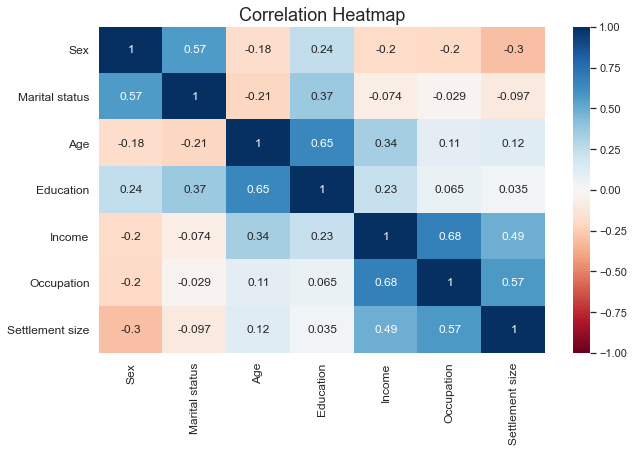

In [7]:
# Correlation in Heatmap form 

plt.figure(figsize=(10,6))
s = sns.heatmap(demo_df.corr(), annot = True, cmap = 'RdBu', vmin = -1, vmax=1)
# different color sets = 'viridis', 'autumn', 'rainbow'
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize =12) 
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize =12) 
plt.title('Correlation Heatmap', fontsize =18)
plt.show()

>I plot the correlations using a Heat Map. We set the range from -1 to 1, as it is the range of the Pearson Correlation. We can visually recognize the strong positive correlation between age and education (r=0.65) or between occupation and income (r=0,68). Some other positive colour value such as the between occupation and settlement size are also observed. These relationships are required for segmentation process.

In [ ]:
plt.figure(figsize =(10, 6))
sns.regplot(demo_df.iloc[:,2], demo_df.iloc[:,4])
plt.xlabel('Age', fontsize = 13)
plt.ylabel('Income', fontsize = 13)
plt.title('Visualisation of Raw Data', fontsize = 15)

> Among the demographic features, I plot the relationship between “Income” and “Age”. A scatter plot is appropriate since both are continuous. Intuitively, they have a positive relationship each other.

<a id='Analysis'></a>
## 4. Data Analysis
### 4.1. Customer Analysis

- i. Standardisation 
- ii. Hierarchical Clustering
- iii. K-means Clustering
- iv. K-Means Clustering based on PCA (Principal Component Analysis)

### i. Standardisation

Clustering, especially k-mean clustering, is sensitive to the scales of feature values. Thus, all features should be transformed so that the values fall within the identical numerical range. By doing so, the differences between the values can be comparable. This is so-called as standardization. So, before clustering, I scaled the data.

In [9]:
from sklearn.preprocessing import StandardScaler 

In [10]:
scaler = StandardScaler()
demo_scaled = scaler.fit_transform(demo_df)

### ii. Hierarchical Clustering 

The purpose of clustering algorithms is to make groups based on each datapoint with similar features. Similarity of datapoints is determined by the distance between them, in a sense that similar datapoints have smaller the distance between points. <br>
In hierarchical clustering algorithm, the datapoints further down in the tree are grouped together. A joint between 2 clusters is represented by a horizontal line linking 2 vertical lines. <br>
To find clusters based on hierarchical clustering, we need to find a horizontal line in the “Dendrogram” to cut. Under the line, every vertical line will signal the beginning of a cluster, and all the leaves connected to the vertical line until the cut, will belong to a separate cluster.


In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
hier_clust = linkage(demo_scaled, method = 'ward')

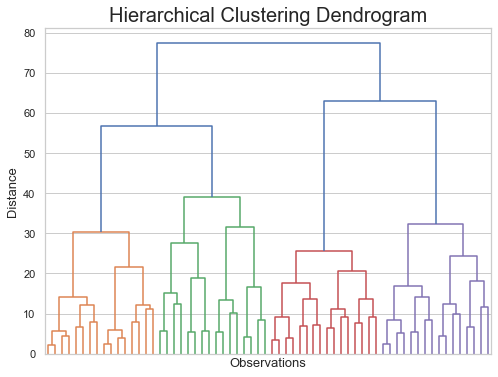

In [13]:
plt.figure(figsize =(8,6))
plt.title('Hierarchical Clustering Dendrogram', fontsize =20)
plt.ylabel('Distance',  fontsize =13)
plt.xlabel('Observations',  fontsize =13)
dendrogram(hier_clust, show_leaf_counts =False,
           truncate_mode = 'level', 
           p = 5, 
           no_labels = True, 
           # color_threshold = 0 : the clusters differrent color 
          )

plt.show()

> Although hierarchical clustering is not very practical, it finds the number of clusters in the data, quickly, when there is no prior knowledge about the number of clusters. This is the major advantage over other methods. For this reason, I performed hierarchical clustering first, to determine optimal number of clusters. 
In practice, we should find the longest vertical line, which is NOT intercepted by a horizontal line from the dendrogram. It seems that 4 clusters are the most appropriate. 


### iii. K-means Clustering 

In [14]:
# Import the relevant library
from sklearn.cluster import KMeans

### Diagonistics of the optimal number of cluster - Elbow Method

> Like my other projects, I found the optimal number of clusters based on "Elbow Method". [See  Capstone Project](https://github.com/SooyeonWon/sales_forecasting_for_new_stores/blob/main/part2_sales_forecasts_for_new_stores.ipynb).  In this section, I compared the number of clusters based on the method with that of Hierarchical Clustering

In [15]:
wcss = {}
for i in range(1, 11): 
    kmeans = KMeans(n_clusters =i, init = 'k-means++', random_state= 42)
    kmeans.fit(demo_scaled)
    wcss[i] = kmeans.inertia_

Text(0.5, 1.0, 'K-means Clustering - Elbow Method')

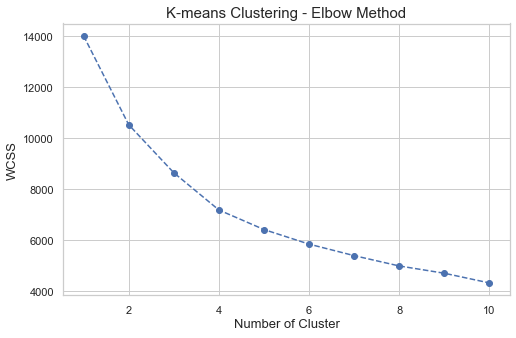

In [16]:
# Elbow method
plt.figure(figsize =(8,5))
plt.plot(list(wcss.keys()), list(wcss.values()),  marker = 'o', linestyle = '--' )

plt.xlabel('Number of Cluster', fontsize = 13)
plt.ylabel('WCSS', fontsize = 13)
plt.title('K-means Clustering - Elbow Method', fontsize = 15)

In [17]:
from kneed import KneeLocator
x, y = list(wcss.keys()), list(wcss.values())
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print('The optimal number of clusters, suggested by Elbow criterion: ', kn.knee)

The optimal number of clusters, suggested by Elbow criterion:  4


> Both results are consistent. Therefore, I continue the K-Centroids Clustering Analysis with 4 number of clusters. 

####  K-Centroids Clustering Analysis

In [18]:
kmeans =KMeans(n_clusters =4, max_iter = 500,  init = 'k-means++', random_state= 42)

In [19]:
kmeans.fit(demo_scaled)

KMeans(max_iter=500, n_clusters=4, random_state=42)

#### Results: K-means Clustering 

In [20]:
df_segm_kmeans = demo_df.copy()

In [21]:
df_segm_kmeans['Segment_KMeans'] = kmeans.labels_
df_segm_kmeans['Segment_KMeans'].replace({0: "A", 1: "B", 2: "C", 3:"D"}, inplace=True)

In [22]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment_KMeans']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment_KMeans,,,,,,,
A,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
B,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
C,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
D,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [23]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N_Obs'] = df_segm_kmeans[['Segment_KMeans', 'Sex']].groupby(['Segment_KMeans'])['Sex'].count()
df_segm_analysis['Prop_Obs'] = df_segm_analysis.N_Obs / df_segm_analysis.N_Obs.sum()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N_Obs,Prop_Obs
Segment_KMeans,,,,,,,,,
A,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
B,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
C,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
D,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


> **Qualitative Analysis of each cluster:** Now, we can analyse the four groups based on the demographic information. 
>- The **Segment A** is composed of men and women almost equally with an average age of 55.7. This is the oldest segment. Almost 70% of customers in Segment A are in relationships and they also have the highest level of education as well as the highest income. This segment can be named as **"Well_Off"** individuals. 
>- Two thirds of people in **Segment B** are male and almost all are single. Their average age is 36 years. Their education level is low on average compared to other segments in terms of salary and jobs.  This segment has the lowest values under 100,000 for annual salary. Also, they live almost exclusively in small cities. These people are considered as people in their thirties with a relatively low income living in small cities. This segment of people can be named as **"Fewer_Opportunities"**.
>- **Segment C** is comprised almost entirely of men. Less than 20 percent of whom are in relationships. Looking at the numbers we observe relatively low values for education paired with high values for income and occupation. Most of this segment lives in big or middle-sized cities. It appears people in this segment are **"Career_Oriented"**.
>- Individuals in the **Segment D** are in relationships with an average age of 29. This is the youngest segment. They have a medium level of education average income and middle management jobs. They seem equally distributed between small mid-sized and big cities. So, they seem average in just about every parameter. We can label the segment average or **"Standard"**.


In [24]:
df_segm_analysis.rename({'A':'well_off', 'B': 'fewer_opportunities', 
                         'C': 'career_oriented', 'D': 'standard' }, inplace =True)

In [25]:
df_segm_kmeans['Labels']  = df_segm_kmeans['Segment_KMeans'].map({'A':'well_off', 'B': 'fewer_opportunities', 
                         'C': 'career_oriented', 'D': 'standard' })

In [ ]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans.Labels, palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means',fontsize = 15)
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

> The green segment well-off is clearly separated as it is highest in both age and income. The other three clusters are overlapped, so it is harder to get more insights just by looking at the plot. To get a clearer result I combined k-means with principal component analysis (PCA).

### iv. K-Means Clustering based on Principal Component Analysis(PCA)

PCA is one of the popular methods for linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. [Reference](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [27]:
from sklearn.decomposition import PCA 

In [28]:
pca = PCA() # So let the PCA variable be an instance of the PCA class.
pca.fit(demo_scaled)

PCA()

In [29]:
# Explained variance proportion of each component.
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

> Components are listed in order of importance. Importance means how much of the variance of the fitted data is explained by each component. There are seven components in essence PCA, by applying a linear transformation on the data which created 7 new variables.  All the 7 components explain 100 percent of the variability of the data. The first component explains around 35,7 percent of the whole variability of the data. The second one 26 percent. I visualised the outputs using a cumulative plot as follows.

Text(0, 0.5, 'Cumulative Explained Variance')

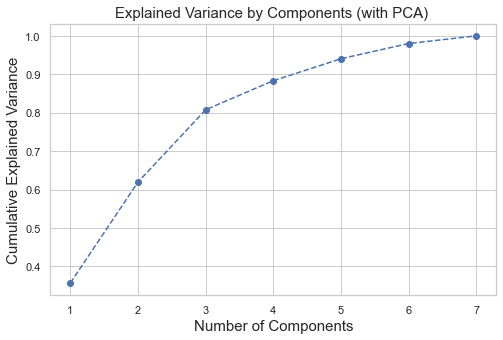

In [30]:
plt.figure(figsize =(8,5))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components (with PCA) ', fontsize= 15)
plt.xlabel('Number of Components', fontsize= 15)
plt.ylabel('Cumulative Explained Variance', fontsize= 15)

> Although we could take all 7 components to earn 100 percent of the information. However, then we cannot take advantages of PCA, which is to reduce the dimensionality of features. Rule of thumb is to keep at least 70 to 80 percent of the explained variance. According to the plot, 3 components will keep almost 80 percent of the initial variability.

In [31]:
pca= PCA(n_components =3)
pca.fit(demo_scaled)

PCA(n_components=3)

###  Results: K-Means Clustering with PCA

In [32]:
# We can obtain more information about the three components with the help of the components attribute of PCA.
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

> Using PCA, we reduced the initial 7 features to 3 components. This explains the shape the values themselves show the so-called “Loadings”. Loadings are correlation between an original variable and a component. For instance, the first value of the array shows the loading of the first feature on the first component.

In [33]:
df_pca_comp = pd.DataFrame(data = pca.components_, columns =demo_df.columns.values, 
                          index = ['component_1', 'component_2', 'component_3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
component_1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
component_2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
component_3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


> Note that all fitted values are between [-1, 1], since the values are basically correlations , meaning that the closer a result is to 0 the lower the loading of a variable onto a component.

Text(0.5, 1.0, 'Loadings')

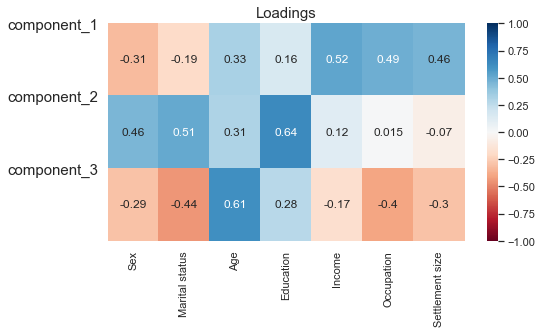

In [34]:
plt.figure(figsize=(8,4))
sns.heatmap(df_pca_comp, vmin = -1, vmax = 1, cmap = 'RdBu', annot = True)
plt.yticks([0,1,2], ['component_1', 'component_2', 'component_3'],rotation = 0, fontsize = 15 )
plt.title('Loadings',  fontsize = 15 )

>- Component 1: There is a positive correlation between component 1 and age, income, occupation. and settlement size. These features are all strictly related to the career of a person. So, this component seems to show the career focused. 
>- Component 2: It does not show a clear picture. Sex, marital status, and education are by far the most prominent determinants. On the other hand, all career related features are almost uncorrelated with it. For this reason, this component does not refer to the career, but rather to an individual's education and lifestyle. 
>- Component 3: Age, marital status and occupation are the most important determinants. Marital status and occupation load negatively but are still important, because I determine the importance of the individual loadings with respect to their absolute values. So the three important aspects of the last component can indicate the experienced person has no matter if work experience or life experience.


> So far, we got several ideas about what the components represent and how is the initial data related to these new features. The original data refers to the original 7 features. Therefore, it is 7 dimensional. We should transform it into 3 dimensionals.


In [35]:
scores_pca = pca.transform(demo_scaled)
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

> After transforming the data, the result is a new array where each observation is described by the 3 components. That is why there are only 3 columns one for each of the new features. These new values are called PCA scores.

### K means with PCA 
#### Diagonistics of the optimal number of cluster - Elbow Method

In [36]:
wcss_pca =  {}
for i in range(1, 11): 
    kmeans_pca = KMeans(n_clusters =i, init = 'k-means++', random_state= 42)
    kmeans_pca.fit(scores_pca) # Note that the component scores are standardized by definition
    wcss_pca[i] = kmeans_pca.inertia_ 

Text(0.5, 1.0, 'K-means Clustering with PCA clustering')

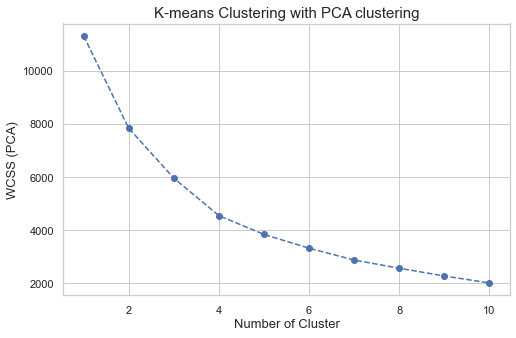

In [37]:
# Elbow method
plt.figure(figsize =(8,5))
plt.plot(list(wcss_pca.keys()), list(wcss_pca.values()),  marker = 'o', linestyle = '--' )

plt.xlabel('Number of Cluster', fontsize = 13)
plt.ylabel('WCSS (PCA)', fontsize = 13)
plt.title('K-means Clustering with PCA clustering', fontsize = 15)

In [38]:
x, y = list(wcss_pca.keys()), list(wcss_pca.values())
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print('The optimal number of clusters, suggested by Elbow criterion: ', kn.knee)

The optimal number of clusters, suggested by Elbow criterion:  4


In [39]:
kmeans_pca = KMeans(n_clusters =4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

#### K means with PCA Results

In [40]:
df_seg_pca_kmeans = pd.concat([demo_df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis =1)
df_seg_pca_kmeans.columns.values[-3:] =  ['component_1', 'component_2', 'component_3']
df_seg_pca_kmeans['Segment_KMeans_PCA'] = kmeans_pca.labels_
df_seg_pca_kmeans['Segment_KMeans_PCA'].replace({0: "W", 1: "X", 2: "Y", 3:"Z"}, inplace=True)

In [41]:
df_seg_pca_kmeans_freq = df_seg_pca_kmeans.groupby(['Segment_KMeans_PCA']).mean()
df_seg_pca_kmeans_freq['N_Obs'] = df_seg_pca_kmeans[['Segment_KMeans_PCA', 'Sex']].groupby(['Segment_KMeans_PCA'])['Sex'].count()
df_seg_pca_kmeans_freq['Prop_Obs'] = df_seg_pca_kmeans_freq.N_Obs / df_seg_pca_kmeans_freq.N_Obs.sum()
df_seg_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component_1,component_2,component_3,N_Obs,Prop_Obs
Segment_KMeans_PCA,,,,,,,,,,,,
W,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446,459,0.2295
X,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981,585,0.2925
Y,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269,693,0.3465
Z,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839,263,0.1315


> **Qualitative interpretation:**
>- Components: <br>
Previously, we evaluated that the first component was related to career. The second component is to education and lifestyle, while the third to their life and or work experience.
>- Clusters: <br>
    **Segment W** has low value on the first and second component, but it has a high value on the third component. In other words, this segment has low career and experience values while normal to high education and lifestyle values. This is the cluster, labelled "Standard" previously. <br>
    **Segment X** shows high values for career but low for education and lifestyle. And as someone independent from experience. It seems to be a "Career_Oriented" segment. <br>
    **Segment Y** shows the lowest average PCA scores for a career and work experience It seems that this is the youngest cluster labelled  "Fewer_Opportunities" previously. has low career and experience values while normal to high education and lifestyle values. <br>
    **Segment Z** is the highest on component_1 and component_2. Also, Segment Z is highest on all three components: career, education and lifestyle and experience. It can be matched to "Well-Off" segment. <br>


In [42]:
df_seg_pca_kmeans_freq.rename({'Z':'well-off', 'Y': 'fewer-opportunities', 
                        'W': 'standard', 'X': 'career_focused'}, inplace =True)

df_seg_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,component_1,component_2,component_3,N_Obs,Prop_Obs
Segment_KMeans_PCA,,,,,,,,,,,,
standard,0.307190,0.098039,35.383442,0.766885,93566.102397,0.248366,0.039216,-1.048838,-0.892116,1.010446,459,0.2295
career_focused,0.027350,0.167521,35.700855,0.731624,141489.721368,1.266667,1.475214,1.367167,-1.050209,-0.247981,585,0.2925
fewer-opportunities,0.900433,0.965368,28.913420,1.062049,107551.946609,0.676768,0.440115,-1.106918,0.706367,-0.778269,693,0.3465
well-off,0.505703,0.688213,55.722433,2.129278,158391.676806,1.129278,1.110266,1.706153,2.031716,0.838839,263,0.1315


> Then I visualized the clusters. Since we are plotting on a 2D plane, we should choose two of the components and use them as axis for the visualization. For most cases, I choose the most important components, since we can be absolutely sure that the first two components explain more variance than the third one.

In [43]:
df_seg_pca_kmeans['Legend'] = df_seg_pca_kmeans['Segment_KMeans_PCA'].map({'Z':'well-off', 'Y': 'fewer-opportunities', 
                        'W': 'standard', 'X': 'career_focused'})

In [ ]:
x_axis = df_seg_pca_kmeans['component_2']
y_axis = df_seg_pca_kmeans['component_1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['Legend'], palette =  ['g', 'c', 'r', 'm'] )
plt.title('Clusters by PCA components', fontsize =20)
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

>**Findings:** Now we clearly see the separate clusters. The green segment is the Well-Off segment and the purple segment is career focused. Both are well-separated. The red and blue represent the standard and fewer opportunities segments, respectively. <br><br>
Previously, when we plotted the K-Means clustering solution without PCA, we could only distinguish the green segment. However now, the division based on the components is much more pronounced. This is one of the largest advantages of using PCA, reducing the number of variables by combining them into bigger more meaningful features.<br><br>
Note that using PCA technique means the features are orthogonal to each other, which means that the difference between components is as big as possible. Still, we can see some overlap between the red and blue segment. However overall, all 4 segments are pretty much clearly separated the spots.


### Data Export using pickle

In [45]:
import pickle # a module used to turn python object into string streams 

In [46]:
# Scaler 
pickle.dump(scaler, open('scaler.pickle', 'wb'))
# PCA 
pickle.dump(pca, open('pca.pickle', 'wb'))
# KMeans PCA 
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))

These exported objects will be used for preprocessing in the second part of analysis: Purchase Analytics.